# SCC0251 - Processamento de Imagens
## Demonstração do projeto final

### Estudantes:

Fernando Akio Tutume de Salles Pucci fernandopucci@usp.br 8957197

Vitor Kodhi Teruya kodhiteruya@usp.br 10284441

Yan Crisóstomo Rohwedder yanrohwedder@usp.br 9779263

## Solucionador de cubo mágico através de imagens das faces do cubo

### 1.Carregando pacotes e lendo imagens

O pacote do solucionador é externo à esse projeto, 
mais detalhes sobre sua implementação podem ser visto em:

https://github.com/pglass/cube

In [1]:
#Carregando funções do python
import imageio
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import colorsys
import math

#Funções implementadas pelo grupo
from color_labelling import *
from face_colors import *
from vertex_finder import *

#Instalar o pacote do solucionador de cubo mágico
!pip install rubik-cube


#Carregar as imagens das faces do cubo
upside = imageio.imread("inputs/upside.PNG") 
leftside = imageio.imread("inputs/leftside.PNG")
frontside = imageio.imread("inputs/frontside.PNG")
rightside = imageio.imread("inputs/rightside.PNG")
backside = imageio.imread("inputs/backside.PNG")
downside = imageio.imread("inputs/downside.PNG")





### 2. Processando as imagens das faces dos cubos

Para a demonstração, as imagens mostradas pertecem apenas à face superior

Carregou imagem :  0


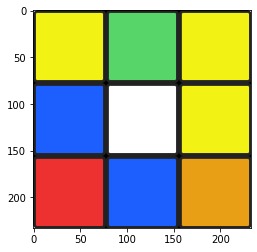

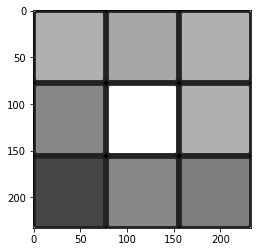

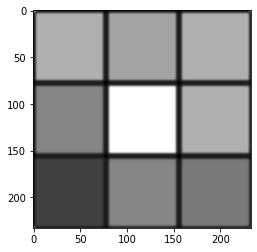

V:  135.0
yolooo


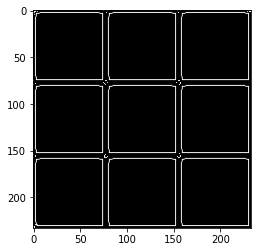

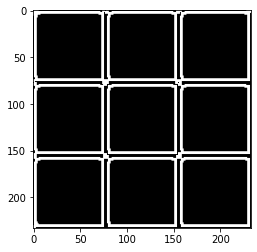

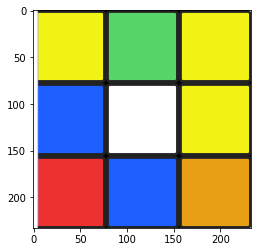

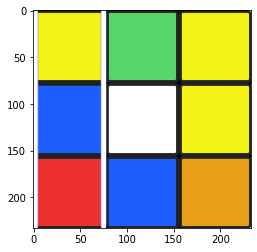

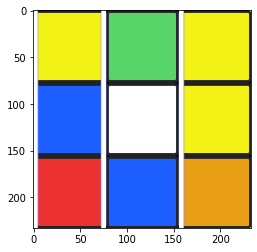

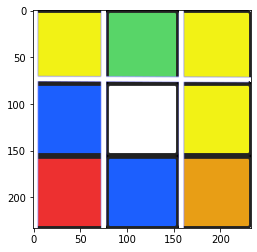

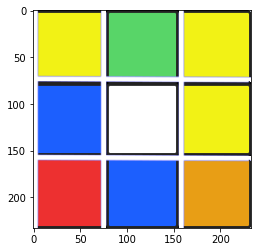

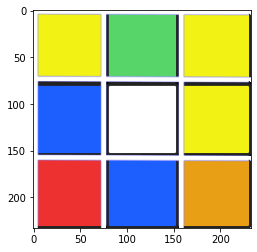

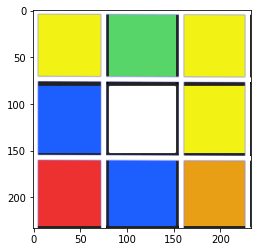

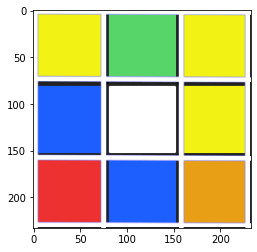

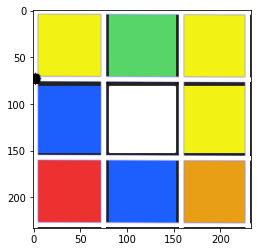

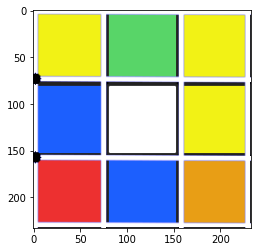

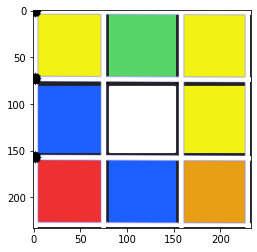

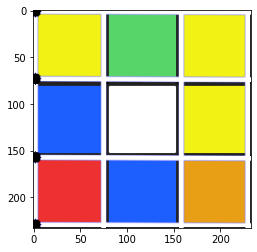

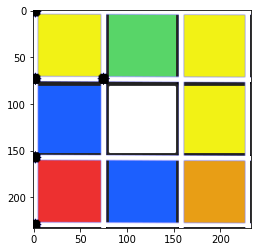

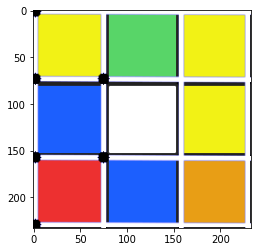

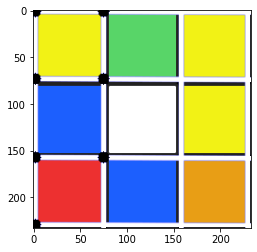

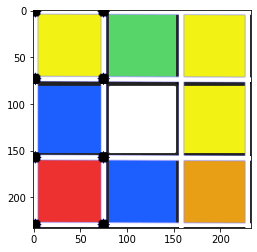

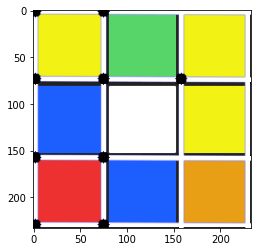

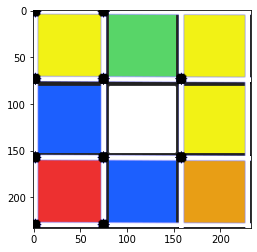

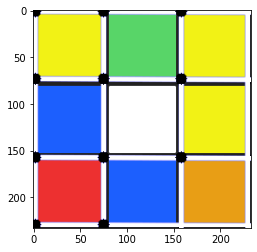

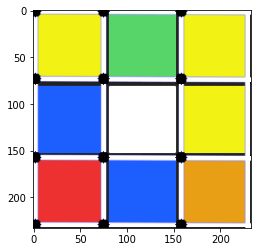

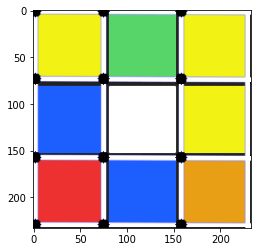

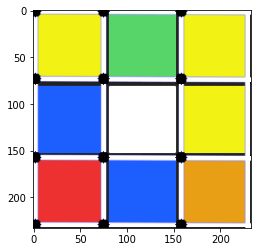

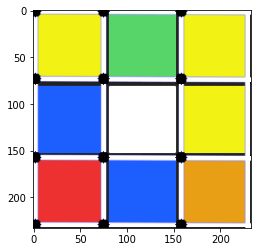

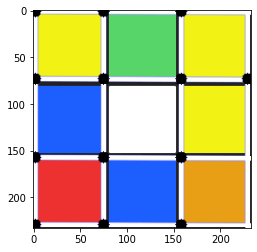

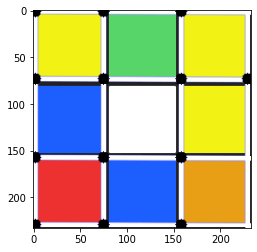

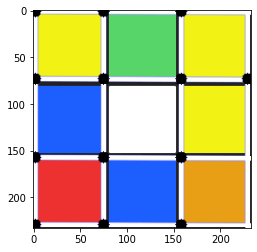

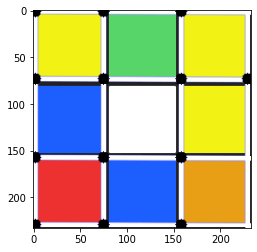

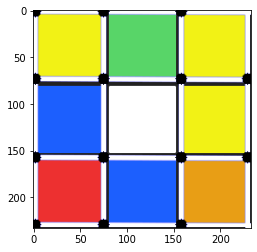

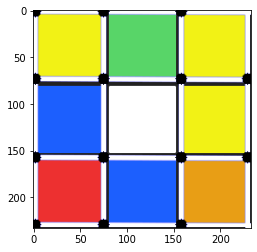

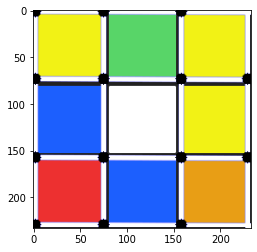

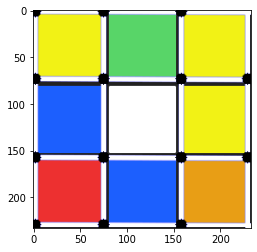

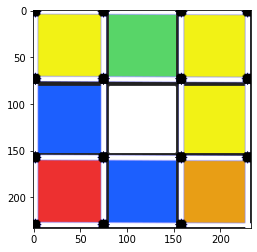

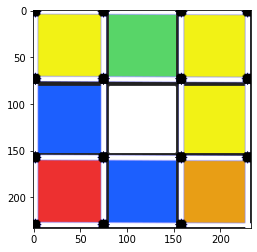

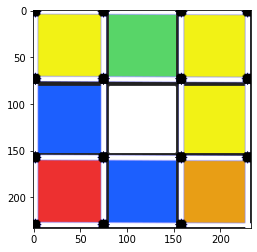

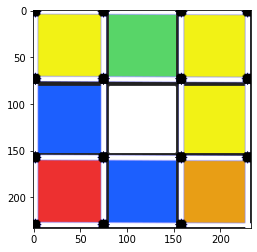

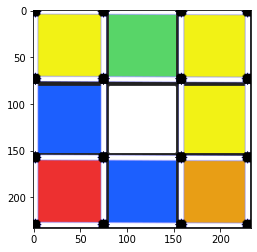

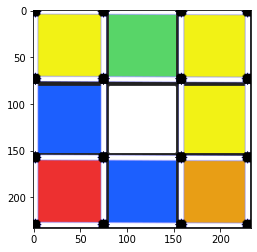

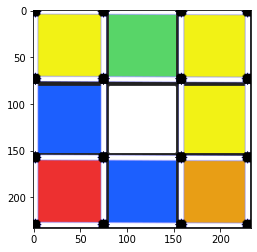

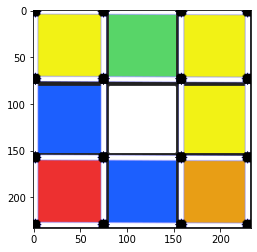

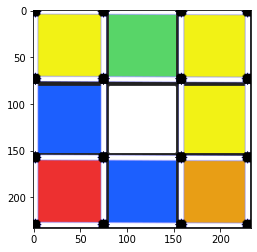

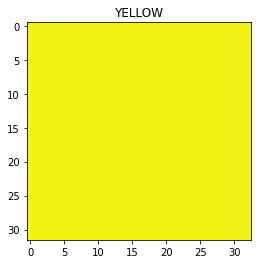

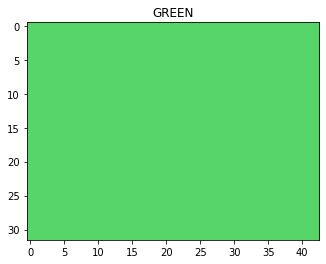

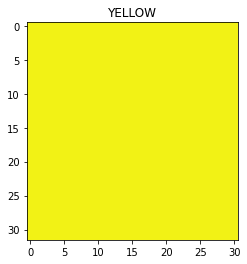

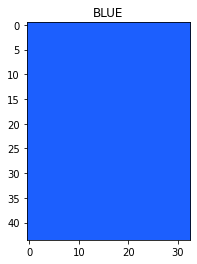

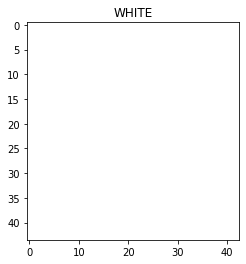

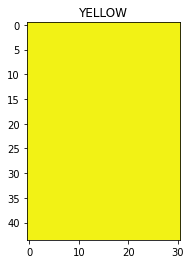

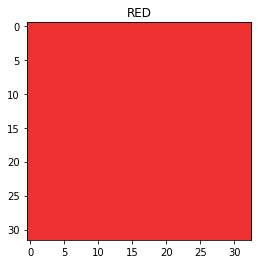

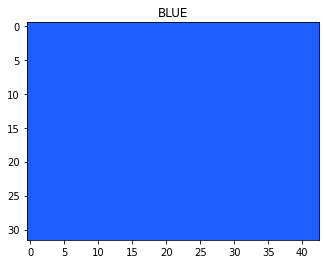

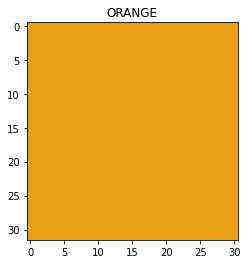

Acabou imagem :  0
Carregou imagem :  1
Acabou imagem :  1
Carregou imagem :  2
Acabou imagem :  2
Carregou imagem :  3
Acabou imagem :  3
Carregou imagem :  4
Acabou imagem :  4
Carregou imagem :  5
Acabou imagem :  5


In [2]:
images = [upside,leftside,frontside,rightside,backside,downside]
cube_labels = []
for printer,image in enumerate(images):
  print('Carregou imagem : ', printer)
  if printer == 0: #apenas plota as imagens da face superior
    img = image.copy()
    show_img_rgb(image)
    gray = to_grayscale(img)
    show_img(gray)
    gaussian = gaussian_blur(gray)
    show_img(gaussian)
    edge = auto_canny(gaussian)
    show_img(edge)

  kernel = np.ones((3,3), np.uint8)
  dilated = dilate(edge, kernel)
  kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
  dilated = cv.filter2D(dilated, cv.CV_8U, kernel)
  if printer == 0:
    show_img(dilated)

  line_points = []
  lines = cv.HoughLines(dilated, 1, np.pi/180, 170)
  if lines is not None:
      for i in range(0, len(lines)):
          rho = lines[i][0][0]
          theta = lines[i][0][1]
          a = math.cos(theta)
          b = math.sin(theta)
          x0 = a * rho
          y0 = b * rho
          pt1 = (int(x0 + img.shape[0]*(-b)), int(y0 + img.shape[1]*(a)))
          pt2 = (int(x0 - img.shape[0]*(-b)), int(y0 - img.shape[1]*(a)))
          pt1 = normalize_point(pt1)
          pt2 = normalize_point(pt2)
          line_points.append((pt1, pt2))
          merged_lines = merge_lines(line_points, 30)
  
  merged_lines = hook_lines(merged_lines, 20, 50)
  for pt1, pt2 in merged_lines:
      cv.line(img, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
      if printer == 0:
        show_img_rgb(img)

  lines = merged_lines.copy()
  points = []
  for line in lines:
      for other in lines:
          if other != line:
              try:
                  p = line_intersect(line[0][0], line[0][1], line[1][0], line[1][1], other[0][0], other[0][1], other[1][0], other[1][1])
              except:
                  pass
              else:
                  points.append(p)
                  img = cv.circle(img, p, radius=6, color=(0, 0, 0, 255), thickness=-1)
                  if printer == 0:
                    show_img_rgb(img)

  points = list(set(points))
  vertexes = create_vertex_matrix(points)
  hls = find_colors(image, vertexes)
  labels = label_colors(hls)
  cube_labels.append(labels)
  if printer == 0:
    find_colors(image, vertexes, labels)
  print('Acabou imagem : ', printer)

### 3. Transformando as labels para o uso do solucionador

In [3]:
cube_labels = np.array(cube_labels)
print(cube_labels)
for face in range(len(cube_labels)):
  cube_labels[face] = np.where(cube_labels[face] == 'ORANGE', 'o', cube_labels[face])
  cube_labels[face] = np.where(cube_labels[face] == 'WHITE', 'w', cube_labels[face])
  cube_labels[face] = np.where(cube_labels[face] == 'BLUE', 'b', cube_labels[face])
  cube_labels[face] = np.where(cube_labels[face] == 'RED', 'r', cube_labels[face])
  cube_labels[face] = np.where(cube_labels[face] == 'YELLOW', 'y', cube_labels[face])
  cube_labels[face] = np.where(cube_labels[face] == 'GREEN', 'g', cube_labels[face])
cube_labels = cube_labels.tolist()
print(cube_labels)

[[['YELLOW' 'GREEN' 'YELLOW']
  ['BLUE' 'WHITE' 'YELLOW']
  ['RED' 'BLUE' 'ORANGE']]

 [['BLUE' 'RED' 'BLUE']
  ['WHITE' 'ORANGE' 'RED']
  ['RED' 'WHITE' 'GREEN']]

 [['WHITE' 'WHITE' 'GREEN']
  ['YELLOW' 'GREEN' 'GREEN']
  ['YELLOW' 'BLUE' 'RED']]

 [['WHITE' 'BLUE' 'BLUE']
  ['YELLOW' 'RED' 'GREEN']
  ['GREEN' 'YELLOW' 'BLUE']]

 [['RED' 'WHITE' 'ORANGE']
  ['RED' 'BLUE' 'RED']
  ['WHITE' 'ORANGE' 'GREEN']]

 [['ORANGE' 'ORANGE' 'WHITE']
  ['ORANGE' 'YELLOW' 'ORANGE']
  ['YELLOW' 'GREEN' 'ORANGE']]]
[[['y', 'g', 'y'], ['b', 'w', 'y'], ['r', 'b', 'o']], [['b', 'r', 'b'], ['w', 'o', 'r'], ['r', 'w', 'g']], [['w', 'w', 'g'], ['y', 'g', 'g'], ['y', 'b', 'r']], [['w', 'b', 'b'], ['y', 'r', 'g'], ['g', 'y', 'b']], [['r', 'w', 'o'], ['r', 'b', 'r'], ['w', 'o', 'g']], [['o', 'o', 'w'], ['o', 'y', 'o'], ['y', 'g', 'o']]]


In [7]:
cube = []
for face in cube_labels:
  facestr = []
  for row in face:
    rowstr = ''
    for label in row:
      rowstr = rowstr + label
    facestr.append(rowstr)
  cube.append(facestr)

cubestr = ''
cubestr = cubestr + cube[0][0] + cube[0][1] + cube[0][2]
cubestr = cubestr + cube[1][0] + cube[2][0] + cube[3][0] + cube[4][0]
cubestr = cubestr + cube[1][1] + cube[2][1] + cube[3][1] + cube[4][1]
cubestr = cubestr + cube[1][2] + cube[2][2] + cube[3][2] + cube[4][2]
cubestr = cubestr + cube[5][0] + cube[5][1] + cube[5][2]


### 4.Usando o solucionador

Infelizmente o solucionador encontrado não foi muito otimizado, retornando uma solução com um alto número de passos.

In [8]:
from rubik.cube import Cube
from rubik.solve import Solver
c = Cube(cubestr)
s = Solver(c)
s.solve()
print(s.moves)
print('Tamanho da solução: ', len(s.moves))

['B', 'B', 'B', 'E', 'L', 'Ei', 'Li', 'B', 'Ei', 'R', 'E', 'Ri', 'Z', 'Di', 'B', 'B', 'B', 'D', 'L', 'L', 'B', 'B', 'B', 'R', 'R', 'Zi', 'U', 'B', 'Ui', 'B', 'B', 'D', 'Bi', 'Di', 'Z', 'B', 'Ri', 'B', 'B', 'R', 'Bi', 'Bi', 'D', 'Bi', 'Di', 'Z', 'D', 'B', 'Di', 'B', 'B', 'B', 'Bi', 'Ri', 'B', 'R', 'Z', 'B', 'B', 'Bi', 'Ri', 'B', 'R', 'Z', 'Z', 'B', 'L', 'Bi', 'Li', 'Bi', 'Di', 'B', 'D', 'Zi', 'B', 'B', 'L', 'Bi', 'Li', 'Bi', 'Di', 'B', 'D', 'Z', 'Z', 'B', 'L', 'Bi', 'Li', 'Bi', 'Di', 'B', 'D', 'Zi', 'Bi', 'Di', 'B', 'D', 'B', 'L', 'Bi', 'Li', 'Z', 'B', 'B', 'B', 'B', 'L', 'Bi', 'Li', 'Bi', 'Di', 'B', 'D', 'Z', 'B', 'L', 'Bi', 'Li', 'Bi', 'Di', 'B', 'D', 'Z', 'X', 'X', 'F', 'D', 'F', 'R', 'Fi', 'Ri', 'Di', 'Xi', 'Xi', 'X', 'X', 'Z', 'F', 'Li', 'Fi', 'L', 'D', 'F', 'Di', 'Li', 'F', 'L', 'F', 'Zi', 'Xi', 'Xi', 'X', 'X', 'Ri', 'Fi', 'R', 'Fi', 'Ri', 'F', 'F', 'R', 'F', 'F', 'Xi', 'Xi', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'R', 'R', 'F', 'D', 'Ui', 'R', 'R', 'Di', 'U', 'F', 'R', 'R',